## get data

In [ ]:
# Перезапускаем среду выполнения и импортируем необходимые библиотеки
import pandas as pd

df = pd.read_csv("../data/normalized_without_outliers_25_55000.csv")
df.shape

In [68]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple


from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import *

<class 'module'>


In [ ]:
# получить X
import numpy as np


X = df.loc[:, "norm_price_1":"norm_price_25"].values  # usual version without norm_floor_price
X.shape

## test different models

## smooth functions

In [81]:
def apply_exponential_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = ExponentialSmoother(window_len=2, alpha=0.1)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('sigma_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="ExponentialSmoother", alpha=0.3)

    print(f"smoth data for ExponentialSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]



In [82]:
def apply_convolution_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = ConvolutionSmoother(window_len=4, window_type='ones')
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('sigma_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="ConvolutionSmoother", alpha=0.3)
    
    print(f"smoth data for ConvolutionSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]


In [83]:
def apply_spectral_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = SpectralSmoother(smooth_fraction=0.3, pad_len=20)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('sigma_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="SpectralSmoother", alpha=0.3)

    print(f"smoth data for SpectralSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [84]:
def apply_polynomial_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = PolynomialSmoother(degree=6)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="PolynomialSmoother", alpha=0.3)

    print(f"smoth data for PolynomialSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [85]:
def apply_spline_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = SplineSmoother(n_knots=6, spline_type='natural_cubic_spline')
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="SplineSmoother", alpha=0.3)

    print(f"smoth data for SplineSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [86]:
def apply_gaussian_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = GaussianSmoother(n_knots=5, sigma=0.7)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="GaussianSmoother", alpha=0.3)

    print(f"smoth data for GaussianSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [87]:
def apply_binner_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = BinnerSmoother(n_knots=6)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="BinnerSmoother", alpha=0.3)

    print(f"smoth data for BinnerSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [88]:
def apply_lowess_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="LowessSmoother", alpha=0.3)

    print(f"smoth data for LowessSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [89]:
def apply_kalman_smoother(prices: list[float], plt: plt) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = KalmanSmoother(component='level_trend', 
                            component_noise={'level':0.1, 'trend':0.1})
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('kalman_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="KalmanSmoother", alpha=0.3)

    print(f"smoth data for KalmanSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

## test

smoth data for ExponentialSmoother is [0.6324233  0.4790318  0.13533164 0.52945867 0.8595084  0.54611127
 0.30645464 0.29594709 0.6011821  0.54554836 0.11483254 0.51271226
 0.98775683 0.68430434 0.34341871 0.31719674 0.21573318 0.12726335
 0.36326109 0.56360822 0.56482785 0.55872971 0.55891735]
smoth data for ConvolutionSmoother is [0.55543672 0.50499109 0.4144385  0.48680927 0.56345811 0.46167558
 0.48770053 0.52531194 0.51871658 0.40534759 0.34349376 0.47754011
 0.6197861  0.52335116 0.53333333 0.60124777 0.42727273 0.25686275
 0.28823529 0.34367201 0.38787879 0.47843137 0.56096257 0.56167558
 0.55918004]
smoth data for SpectralSmoother is [0.44768066 0.48522603 0.53196467 0.56211849 0.55862746 0.52150329
 0.4673285  0.42073356 0.40256573 0.42062939 0.46701422 0.5224314
 0.56469367 0.57712004 0.55357427 0.49912545 0.42743253 0.35677954
 0.30611661 0.2913358  0.32143323 0.39473067 0.49653074 0.60034758
 0.67417399]
smoth data for PolynomialSmoother is [0.50367392 0.55473961 0.5354277 

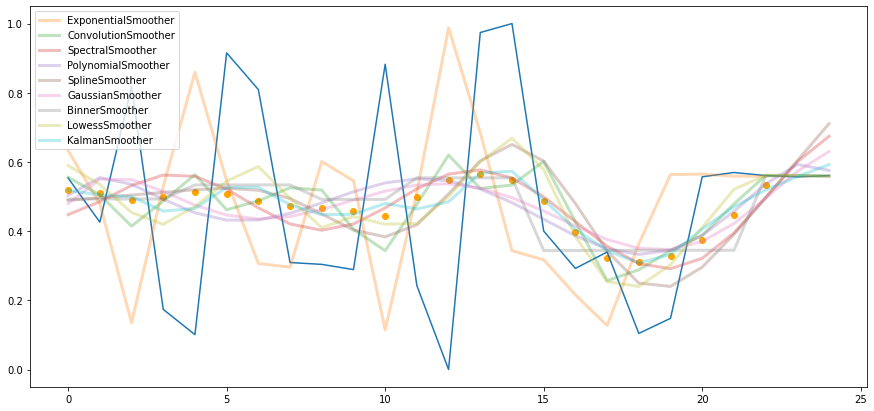

smoth data for ExponentialSmoother is [0.49306279 0.37063575 0.0866988  0.01524231 0.33187858 0.45143955
 0.16418056 0.40346535 0.53950625 0.36321001 0.44723814 0.63861386
 0.74501694 0.78846404 0.9138223  0.88991662 0.77455706 0.83839239
 0.76898775 0.63968864 0.56347707 0.68837936 0.86014851]
smoth data for ConvolutionSmoother is [0.47376238 0.4325495  0.33465347 0.23032178 0.28576733 0.2200495
 0.20074257 0.3384901  0.41373762 0.35792079 0.40655941 0.54306931
 0.55       0.63836634 0.76806931 0.81955446 0.82487624 0.85556931
 0.82054455 0.74789604 0.68923267 0.70928218 0.69950495 0.74294554
 0.78762376]
smoth data for SpectralSmoother is [0.55127137 0.46734631 0.3357824  0.21467362 0.15332788 0.16921107
 0.24262127 0.33122881 0.39573011 0.4219782  0.42728573 0.44775773
 0.51431611 0.63145509 0.77116917 0.88586465 0.93328597 0.89962235
 0.80785256 0.70651698 0.64491396 0.64817221 0.70563415 0.77857264
 0.82263594]
smoth data for PolynomialSmoother is [0.54953241 0.40832994 0.31792689

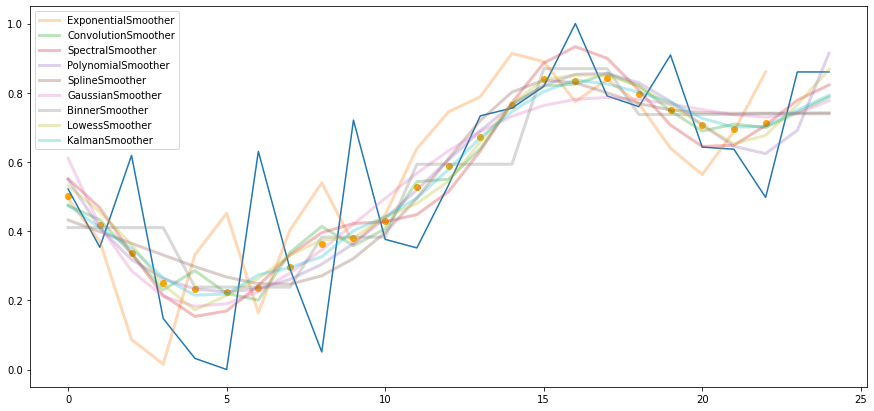

smoth data for ExponentialSmoother is [0.58555239 0.44510881 0.41309184 0.28877842 0.3924077  0.59511229
 0.32527984 0.43627894 0.80369186 0.63648057 0.54046444 0.54112494
 0.60860043 0.70041021 0.49673225 0.57665299 0.85774873 0.87871098
 0.78801363 0.87172356 0.47368421 0.30070222 0.57133421]
smoth data for ConvolutionSmoother is [0.62483487 0.56420079 0.52021136 0.44966975 0.40277411 0.44861295
 0.36182299 0.44874505 0.5661823  0.55323646 0.54412153 0.6343461
 0.61862616 0.59352708 0.56301189 0.60422721 0.68745046 0.71519155
 0.72351387 0.85852048 0.69788639 0.63077939 0.57437252 0.54280053
 0.45706737]
smoth data for SpectralSmoother is [0.66684321 0.60201942 0.50853476 0.42005097 0.36491748 0.35707393
 0.39353532 0.45809571 0.52866788 0.58509113 0.61502257 0.61681039
 0.59922919 0.57839261 0.57237038 0.59449527 0.64715253 0.71852467
 0.78453687 0.81663609 0.79338767 0.71139796 0.59027994 0.46817669
 0.38834705]
smoth data for PolynomialSmoother is [0.71176325 0.5333616  0.45147536

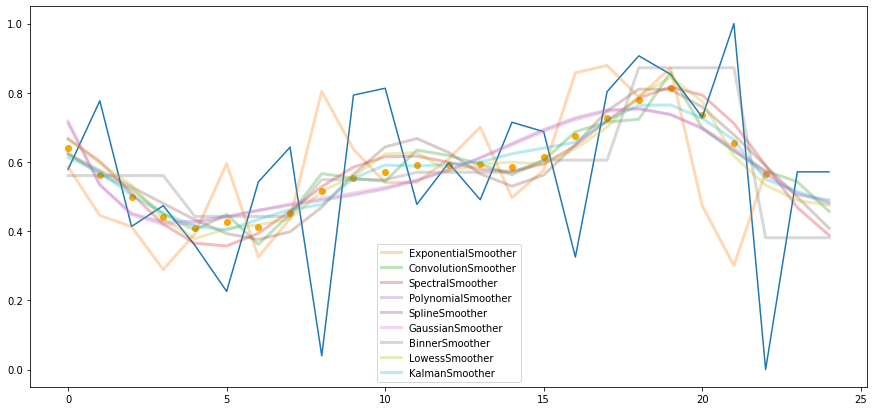

smoth data for ExponentialSmoother is [0.26625387 0.28374973 0.39106487 0.19245446 0.2131183  0.40564475
 0.40917273 0.40708474 0.45615235 0.55270358 0.65080279 0.71124631
 0.52865577 0.35499316 0.45939232 0.29055368 0.40323277 0.80678955
 0.94654043 0.93952048 0.88616891 0.89182087 0.89603283]
smoth data for ConvolutionSmoother is [0.32339261 0.32653899 0.33611491 0.26443228 0.27373461 0.31833105
 0.32585499 0.325171   0.42599179 0.46429549 0.52298222 0.58495212
 0.5753762  0.54555404 0.5369357  0.40779754 0.40697674 0.51340629
 0.64240766 0.70875513 0.8753762  0.91108071 0.9128591  0.89206566
 0.89425445]
smoth data for SpectralSmoother is [0.30180857 0.30252111 0.31448201 0.32239324 0.31364815 0.29075995
 0.27399172 0.29101516 0.35880705 0.46871389 0.58492595 0.65946219
 0.65704414 0.57658127 0.45657732 0.359766   0.34356144 0.43122094
 0.59910167 0.78740042 0.92939005 0.98409945 0.95524492 0.88638334
 0.83498701]
smoth data for PolynomialSmoother is [0.36881066 0.33032441 0.2844460

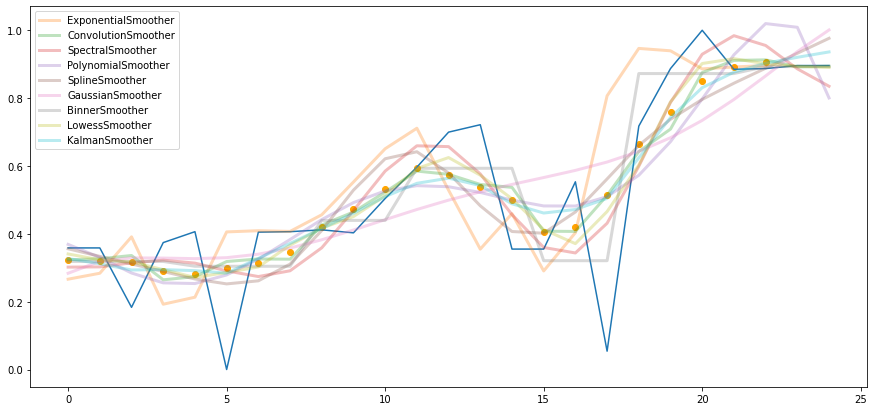

smoth data for ExponentialSmoother is [0.6289103  0.72305411 0.50363232 0.51460341 0.73194959 0.49058562
 0.27842847 0.24773907 0.24240178 0.40192735 0.27887324 0.24759081
 0.32512973 0.3693106  0.61126761 0.4278725  0.1943662  0.32779837
 0.29962936 0.43602669 0.69814678 0.86523351 0.85025945]
smoth data for ConvolutionSmoother is [0.70478873 0.73577465 0.61352113 0.6343662  0.60788732 0.57915493
 0.43605634 0.46760563 0.33577465 0.32901408 0.25464789 0.30985915
 0.28957746 0.35605634 0.37577465 0.41464789 0.35943662 0.41014085
 0.33802817 0.33633803 0.44056338 0.60169014 0.65521127 0.76507042
 0.82929577]
smoth data for SpectralSmoother is [0.7061061  0.70189382 0.68744395 0.65929693 0.61576402 0.5574688
 0.48758765 0.41224816 0.34080929 0.28505027 0.25638576 0.2613375
 0.29707098 0.34976568 0.39799187 0.42101479 0.4090202  0.37030205
 0.33087825 0.32506769 0.38004067 0.50101322 0.66448362 0.82391666
 0.92668325]
smoth data for PolynomialSmoother is [0.69959058 0.7550599  0.72396719 

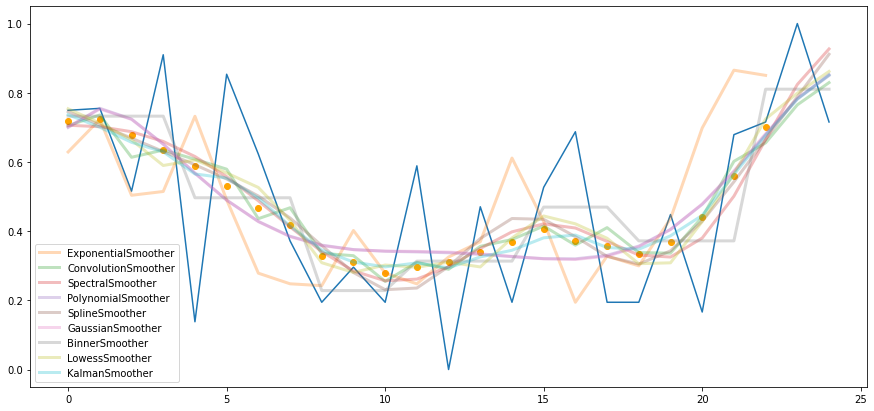

In [93]:
for i in range(5):
    prices = X[i]

    fig = plt.figure(figsize=(15,7))
    plt.plot(prices)

    smoothed_predicts_list = []  # списки предиктов каждого модуля заносятся сюда (9 списков, каждый - список предсказаний)
    
    plt, pred = apply_exponential_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_convolution_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_spectral_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_polynomial_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_spline_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_gaussian_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_binner_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_lowess_smoother(prices, plt)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_kalman_smoother(prices, plt)
    smoothed_predicts_list.append(pred)

    # не все возвращают полное кол-во значений, так как некоторые используют оконные функции
    smoothed_predicts_list = [module_predict[:23] for module_predict in smoothed_predicts_list]
    # Convert the list to a numpy array for easier manipulation
    smoothed_data_array = np.array(smoothed_predicts_list)

    # Calculate the mean excluding the largest and smallest values
    mean_of_predicts_without_extremes = np.mean(np.partition(smoothed_data_array, (2, -2), axis=0)[2:-2], axis=0)

    print(mean_of_predicts_without_extremes)

    plt.scatter(range(len(mean_of_predicts_without_extremes)), mean_of_predicts_without_extremes, color="orange")

    plt.legend()
    plt.show()